In [1]:
import pandas as pd
import numpy as np

import scanpy as sc
import dynamo as dyn
dyn.configuration.set_pub_style()

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import seaborn as sns
histone_palette = {
    'H3K27ac':sns.color_palette('colorblind')[0],
    'H3K9ac':sns.color_palette('colorblind')[1],
    'H3K4me3':sns.color_palette('colorblind')[2],
    'H3K4me1':sns.color_palette('colorblind')[3],
    'H3K9me3':sns.color_palette('colorblind')[4],
    'H3K27me3':sns.color_palette('colorblind')[5],
    'H3K36me3':sns.color_palette('colorblind')[6],
}

from scipy.stats import pearsonr
from scipy.stats import spearmanr

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
adata = sc.read_h5ad('data/encode_data/adata_genes.h5ad')

# Figure 1

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [32.4434s]
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [15.2823s]
|-----------> plotting with basis key=X_umap
|-----------> skip filtering histone by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_umap
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.6845s]
|-----------> plotting with basis key=X_umap
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.6918s]
|-----------> plotting with basis key=X_umap
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.0852s]
|-----------> plotting with basis key=X_umap
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.8625s]
|-----------> plotting with basis key=X_umap
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.7459s]
|-----------> plotting with basis key=X_umap
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [2.1379s]
|-----------> plotting with basis key=X_umap
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.4454s]
|-----------> plotting with basis key=X_umap


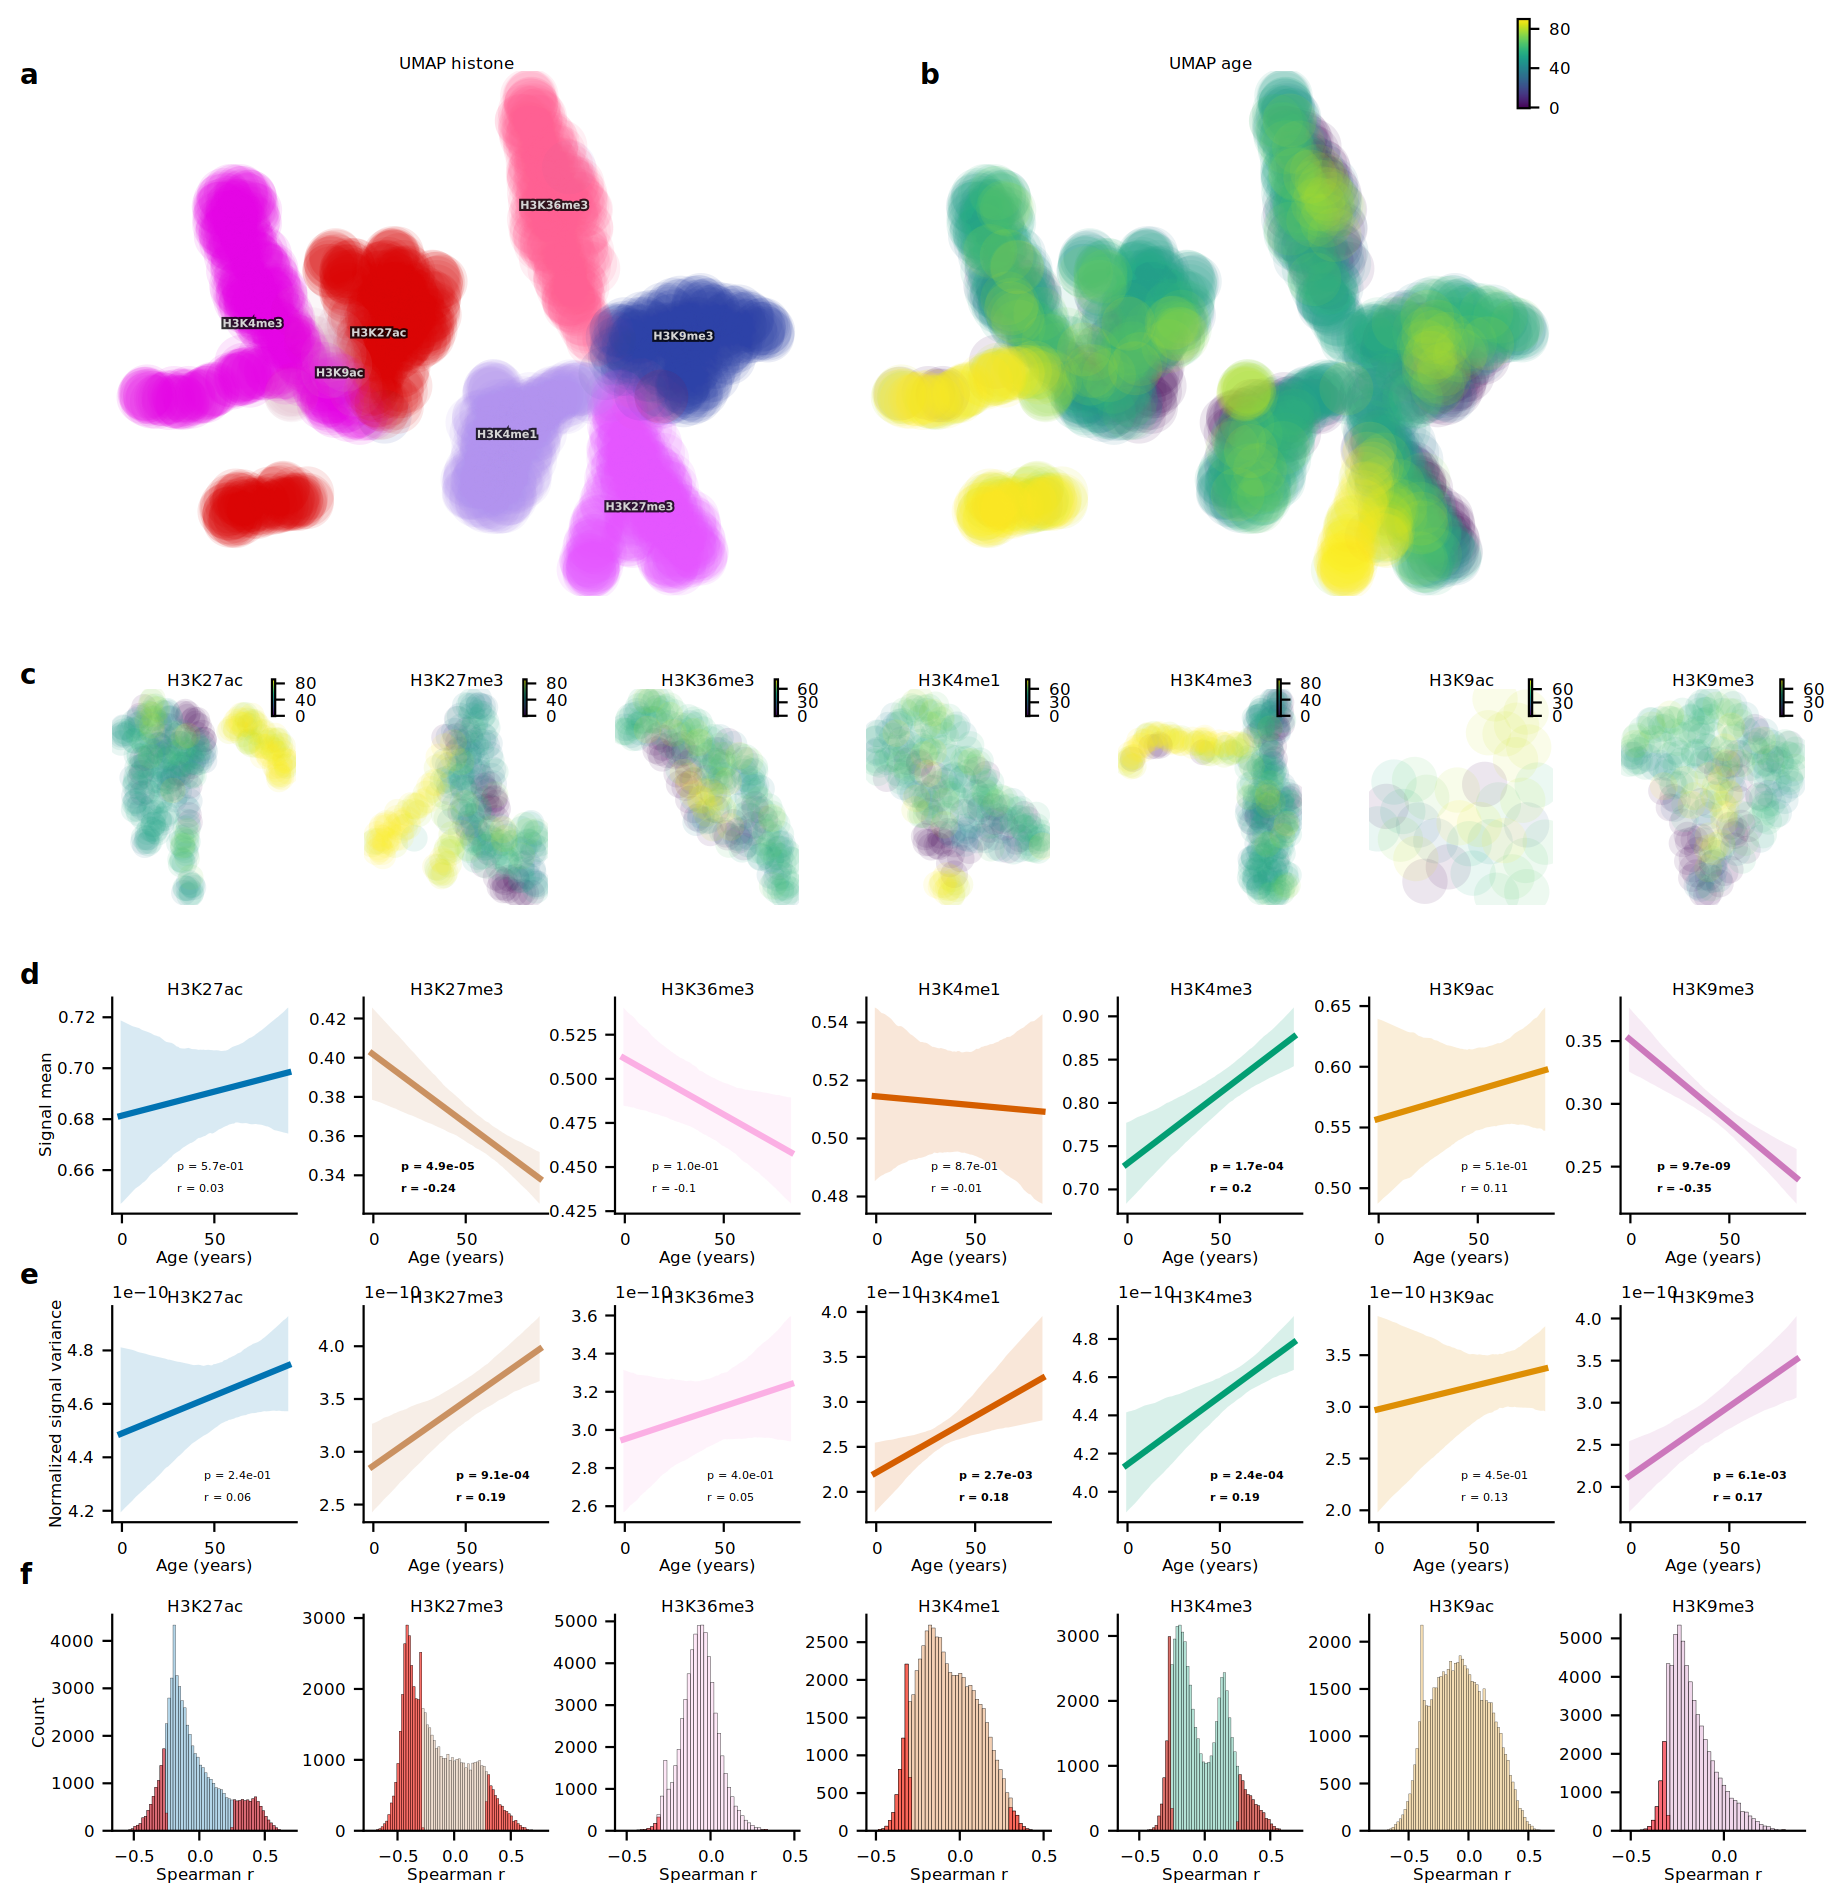

In [3]:
def get_axis_location(axis_lim, d=0.5):
    loc = (axis_lim[1] - axis_lim[0])*d + axis_lim[0]
    return loc

nrows=8
ncols=7

fig_height=nrows*1.5
fig_width=ncols*1.5

fig = plt.figure(figsize=(fig_width, fig_height))
gs = GridSpec(nrows=nrows, ncols=ncols)

fig.text(0, (nrows-0)/nrows - 0.01, 'a', size=10, weight="bold")
fig.text(3/7, (nrows-0)/nrows - 0.01, 'b', size=10, weight="bold")
fig.text(0, (nrows-2)/nrows - 0.01, 'c', size=10, weight="bold")
fig.text(0, (nrows-3)/nrows - 0.01, 'd', size=10, weight="bold")
fig.text(0, (nrows-4)/nrows - 0.01, 'e', size=10, weight="bold")
fig.text(0, (nrows-5)/nrows - 0.01, 'f', size=10, weight="bold")

for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
    ax = fig.add_subplot(gs[3, i])
    x = adata.obs[adata.obs.histone == histone].age
    y = np.apply_along_axis(np.mean, 1, adata.X[adata.obs.histone == histone])
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i == 0:
        ax.set_ylabel('Signal mean')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    corr, p_value = pearsonr(x,y)   
    corr = round(corr,2)
    if p_value < 0.05:
        weight = 'bold'
    else:
        weight=None
    if corr < -0.05:
        x_legend_loc = 0.2
    elif corr > -0.05 and corr < 0.05:
        x_legend_loc = 0.35
    else:
        x_legend_loc = 0.5
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'p = ' + '{:0.1e}'.format(p_value), weight=weight)
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'r = ' + '{}'.format(corr), weight=weight)
    
def normalize_row(x):
    return x/np.sum(x)
    
for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
    ax = fig.add_subplot(gs[4, i])
    x = adata.obs[adata.obs.histone == histone].age
    norm_x = np.apply_along_axis(normalize_row, 1, adata.X[adata.obs.histone == histone])
    y = np.apply_along_axis(np.var, 1, norm_x)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i == 0:
        ax.set_ylabel('Normalized signal variance')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    corr, p_value = pearsonr(x,y)   
    corr = round(corr,2)
    if p_value < 0.05:
        weight = 'bold'
    else:
        weight=None
    if corr < -0.05:
        x_legend_loc = 0.2
    elif corr > -0.05 and corr < 0.05:
        x_legend_loc = 0.35
    else:
        x_legend_loc = 0.5
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'p = ' + '{:0.1e}'.format(p_value), weight=weight)
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'r = ' + '{}'.format(corr), weight=weight)

try:
    df_spearman_rs = pd.read_pickle('results/df_spearman_rs.pkl')
    df_spearman_p_values = pd.read_pickle('results/df_spearman_p_values.pkl')
except:
    rs = []
    p_values = []
    for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
        rs_histone = []
        p_values_histone = []
        for i in range(adata.X.shape[1]):
            r, p_value = spearmanr(adata.X[adata.obs.histone == histone][:,i], adata.obs[adata.obs.histone == histone].age)
            rs_histone += [r]
            p_values_histone += [p_value]
        rs += [rs_histone]
        p_values += [p_values_histone]
    df_spearman_rs = pd.DataFrame(np.array(rs).T, columns = np.unique(adata.obs.histone), index=adata.var_names)
    df_spearman_p_values = pd.DataFrame(np.array(p_values).T, columns = np.unique(adata.obs.histone), index=adata.var_names)
    df_spearman_rs.to_pickle('results/df_spearman_rs.pkl')
    df_spearman_p_values.to_pickle('results/df_spearman_p_values.pkl')

for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
    ax = fig.add_subplot(gs[5, i])
    sns.histplot(x=df_spearman_rs[histone], binwidth=0.02, color=histone_palette[histone], alpha= 0.3, ax = ax)
    sns.histplot(x=df_spearman_rs[histone][df_spearman_p_values[histone] < 0.05/62241], binwidth=0.02, color='red', alpha= 0.5, ax = ax)
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Spearman r')
    
plt.tight_layout()

dyn.tl.reduceDimension(adata, basis='umap', enforce=True)
dyn.tl.reduceDimension(adata, basis='pca', enforce=True)

ax = fig.add_subplot(gs[0:2, 0:3])
dyn.pl.scatters(adata, basis='umap', color=['histone',], ax=ax)
ax.set_title('UMAP histone')

ax = fig.add_subplot(gs[0:2, 3:6])
dyn.pl.scatters(adata, basis='umap', color=['age',], color_key=histone_palette, ax=ax)
ax.set_title('UMAP age')

for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
    ax = fig.add_subplot(gs[2, i])
    adata_copy = adata[adata.obs.histone == histone].copy()
    dyn.tl.reduceDimension(adata_copy, basis='umap', enforce=True)
    dyn.pl.scatters(adata_copy, basis='umap', color=['age',], pointsize=0.1, ax=ax)
    ax.set_title(histone)
    
plt.show()

fig.savefig("figures/figure1.pdf", bbox_inches='tight')

fig

# Supplementary Figure 1

|-----------> plotting with basis key=X_pca
|-----------> skip filtering histone by stack threshold when stacking color because it is not a numeric type
|-----------> plotting with basis key=X_pca
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.7313s]
|-----------> plotting with basis key=X_pca
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.8094s]
|-----------> plotting with basis key=X_pca
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.0480s]
|-----------> plotting with basis key=X_pca
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.2891s]
|-----------> plotting with basis key=X_pca
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [4.3848s]
|-----------> plotting with basis key=X_pca
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [1.6639s]
|-----------> plotting with basis key=X_pca
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [3.5017s]
|-----------> plotting with basis key=X_pca


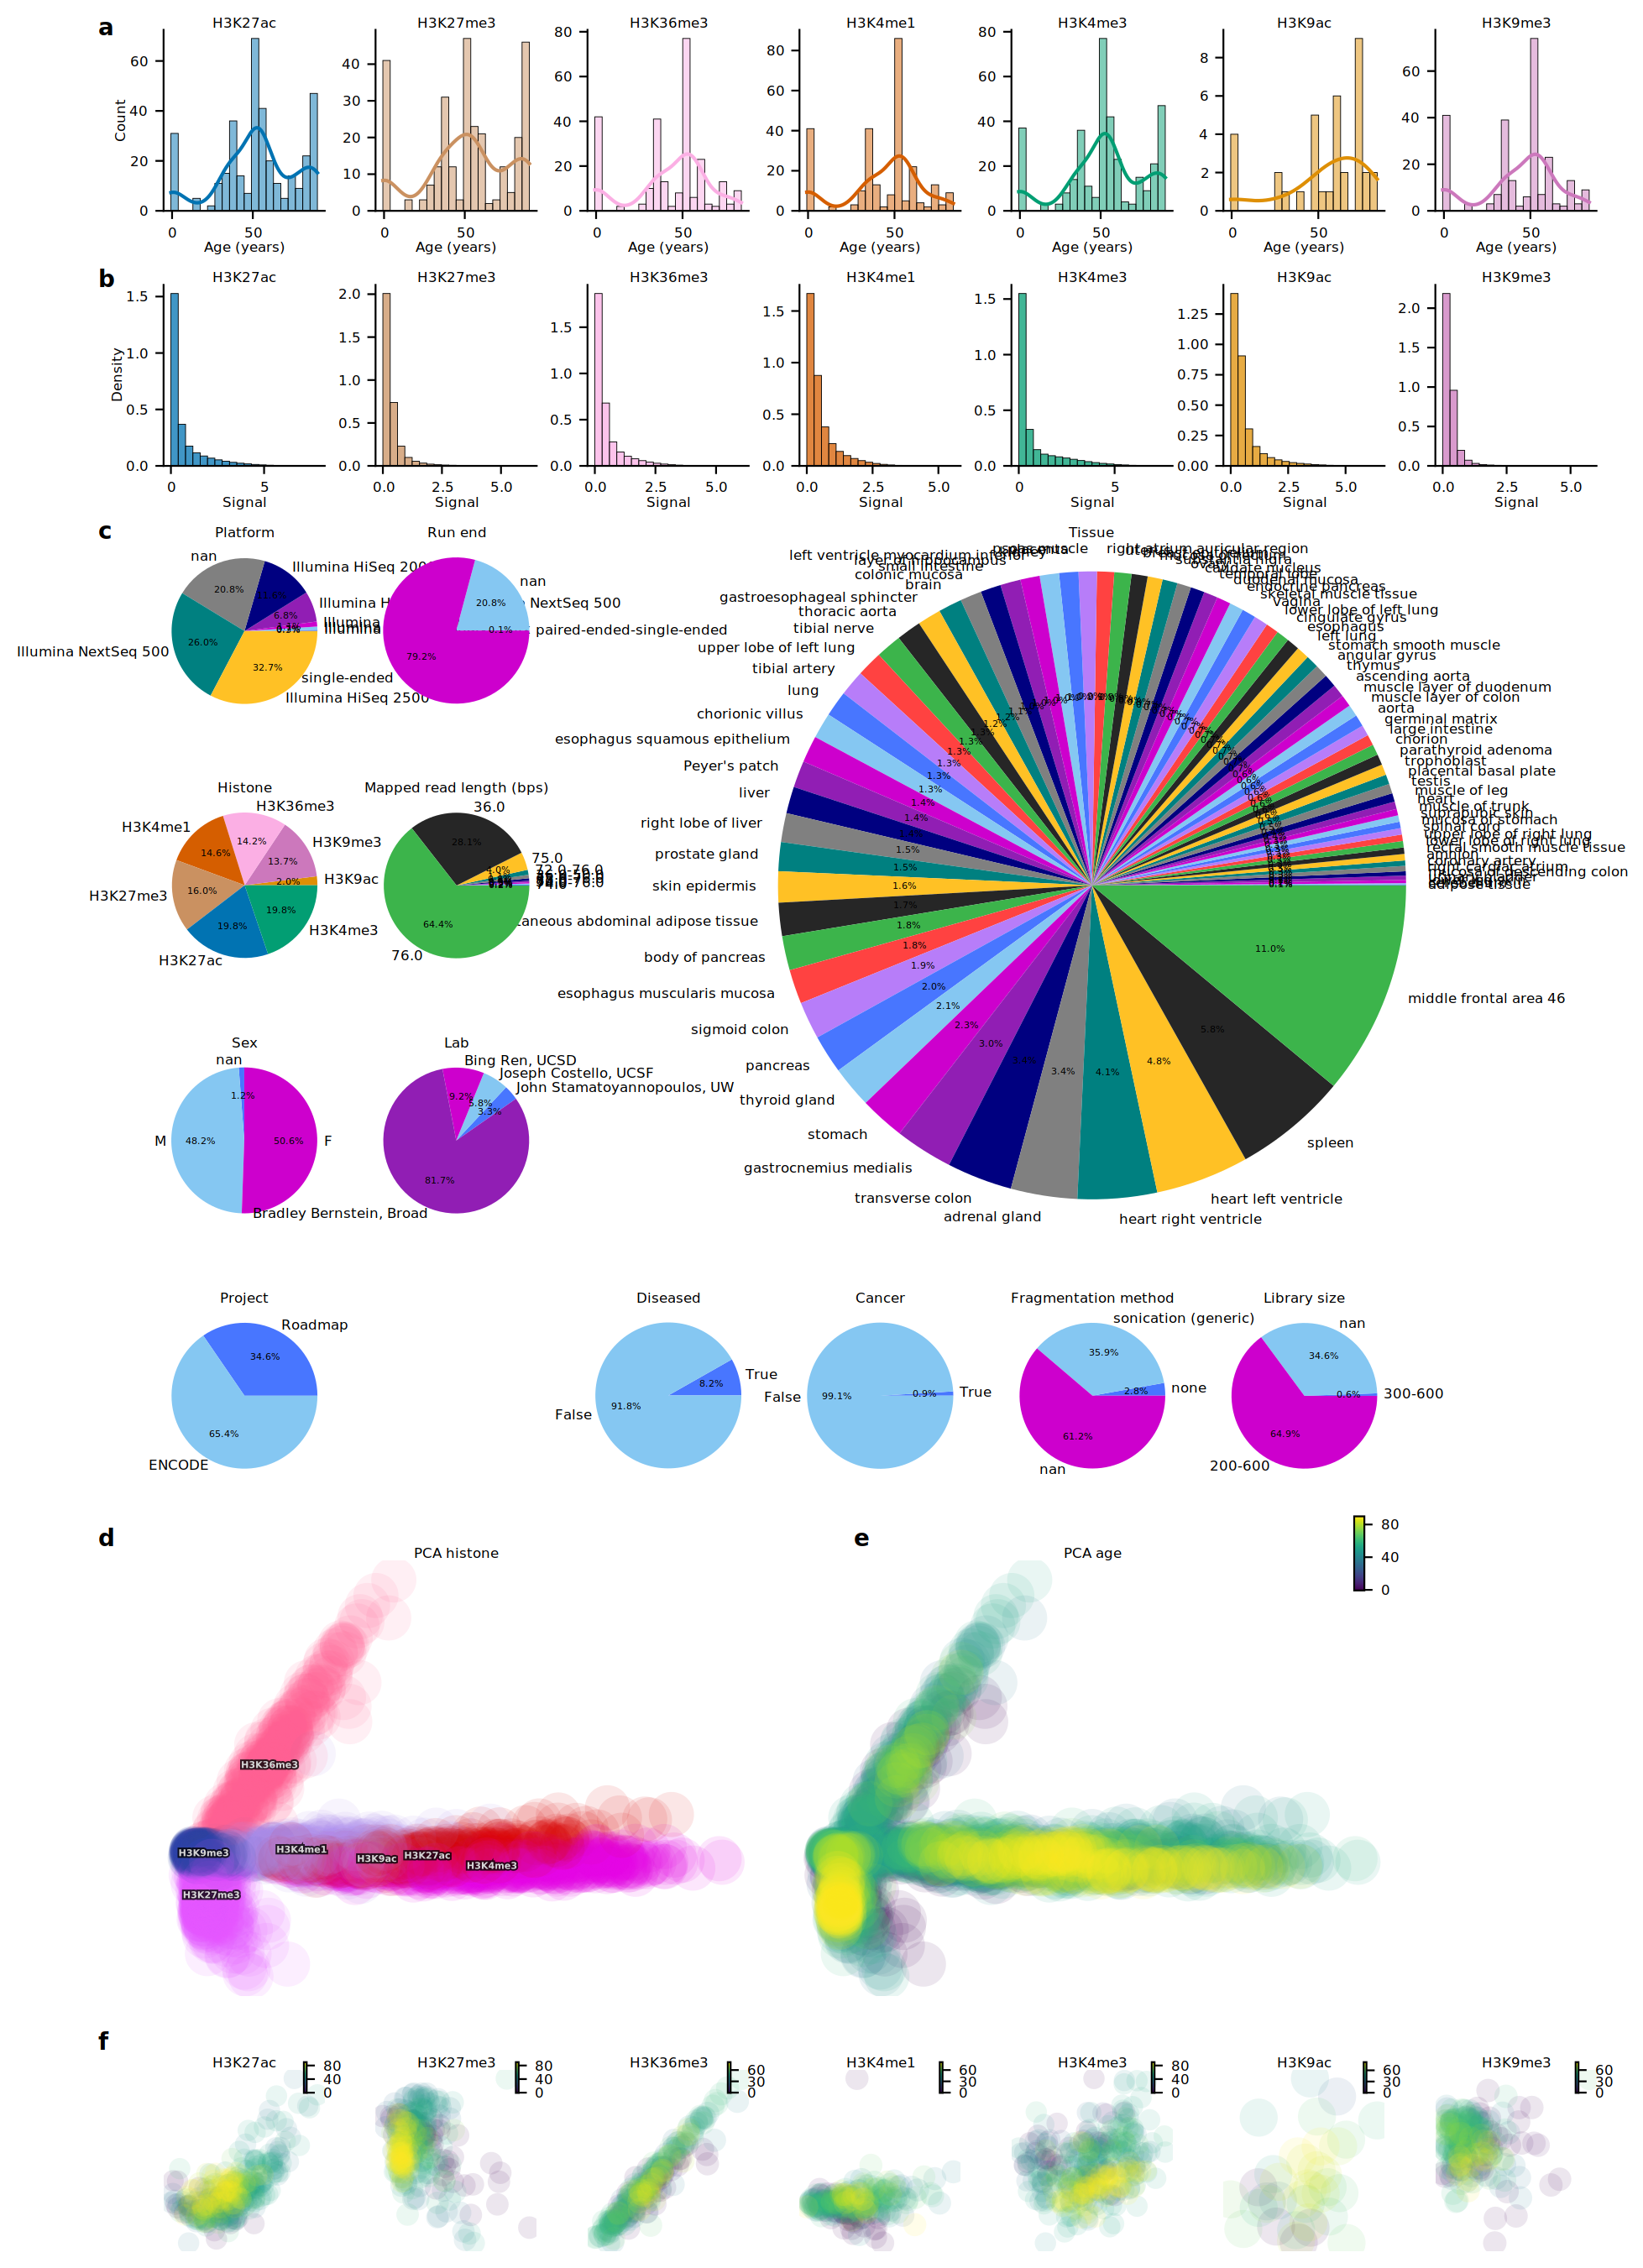

In [4]:
nrows=12
ncols=7

fig_height=nrows*1.5
fig_width=ncols*1.5

fig = plt.figure(figsize=(fig_width, fig_height))
gs = GridSpec(nrows=nrows, ncols=ncols)

fig.text(0, (nrows-0)/nrows - 0.01, 'a', size=10, weight="bold")
fig.text(0, (nrows-1)/nrows - 0.01, 'b', size=10, weight="bold")
fig.text(0, (nrows-2)/nrows - 0.01, 'c', size=10, weight="bold")
fig.text(0, (nrows-6)/nrows - 0.01, 'd', size=10, weight="bold")
fig.text(3/7, (nrows-6)/nrows - 0.01, 'e', size=10, weight="bold")
fig.text(0, (nrows-8)/nrows - 0.01, 'f', size=10, weight="bold")

for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
    ax = fig.add_subplot(gs[0, i])
    sns.histplot(data=adata.obs[adata.obs.histone == histone], x='age', kde=True, bins=20, color=histone_palette[histone], ax = ax)
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    
for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
    ax = fig.add_subplot(gs[1, i])
    sns.histplot(x=np.array(adata.X[adata.obs.histone == histone]).flatten(), kde=False, stat='density', bins=20, color=histone_palette[histone], ax = ax)
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i == 0:
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Signal')
    
ax = fig.add_subplot(gs[2:5, 2:7])
ax.set_title('Tissue')
labels = np.unique(adata.obs.tissue)
sizes = [np.sum(adata.obs.tissue == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.07,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

#ax3 = fig.add_axes([0.5, 0.5, None, 0.2]) #[lowerCorner_x, lowerCorner_y, width, height]
    
#for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
#    ax = fig.add_subplot(gs[2, i])
#    sns.histplot(data=adata.obs[adata.obs.histone == histone], x='n_nas', kde=False, bins=20, color=histone_palette[histone], ax = ax)
#    ax.set_title(histone)
#    ax.spines['right'].set_visible(False)
#    ax.spines['top'].set_visible(False)
#    if i == 0:
#        ax.set_ylabel('Count')
#    else:
#        ax.set_ylabel(None)
#    ax.set_xlabel('Number of NAs per sample')
#    
#plt.tight_layout()
    
ax = fig.add_subplot(gs[2, 0])
ax.set_title('Platform')
labels = np.unique(adata.obs.platform)
sizes = [np.sum(adata.obs.platform == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
#labels = ['',
#         '',
#         'others',
#         'multiple',
#         'HiSeq 2000',
#         'nan',
#         'NextSeq 500',
#         'HiSeq 2500']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[3, 0])
ax.set_title('Histone')
labels = np.unique(adata.obs.histone)
sizes = [np.sum(adata.obs.histone == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        colors=[histone_palette[histone] for histone in labels],
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[4, 0])
ax.set_title('Sex')
labels = np.unique(adata.obs.sex)
sizes = [np.sum(adata.obs.sex == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[5, 0])
ax.set_title('Project')
labels = np.unique(adata.obs.project)
sizes = [np.sum(adata.obs.project == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[2, 1])
ax.set_title('Run end')
labels = np.unique(adata.obs.run_end)
sizes = [np.sum(adata.obs.run_end == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[3, 1])
ax.set_title('Mapped read length (bps)')
labels = np.unique(adata.obs.mapped_read_length)
sizes = [np.sum(adata.obs.mapped_read_length == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
#labels = ['', '', '', '', '', '',
#       'others', '75', '36', '76']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[4, 1])
ax.set_title('Lab')
labels = np.unique(adata.obs.lab)
sizes = [np.sum(adata.obs.lab == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=35)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#ax = fig.add_subplot(gs[6, 1])
#ax.set_title('Biological replicates')
#labels = np.unique(adata.obs.biological_replicate_count)
#sizes = [np.sum(adata.obs.biological_replicate_count == i) for i in labels]
#labels = labels[np.argsort(sizes)]
#sizes = np.sort(sizes)
#ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
#        shadow=False, startangle=0)
#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[5, 2])
ax.set_title('Diseased')
labels = np.unique(adata.obs.disease)
sizes = [np.sum(adata.obs.disease == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[5, 3])
ax.set_title('Cancer')
labels = np.unique(adata.obs.cancer)
sizes = [np.sum(adata.obs.cancer == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[5, 4])
ax.set_title('Fragmentation method')
labels = np.unique(adata.obs.library_fragmentation_method)
sizes = [np.sum(adata.obs.library_fragmentation_method == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
#labels = ['none', 'multiple', 'sonication',
#       'nan']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[5, 5])
ax.set_title('Library size')
labels = np.unique(adata.obs.library_size_range)
sizes = [np.sum(adata.obs.library_size_range == i) for i in labels]
labels = labels[np.argsort(sizes)]
sizes = np.sort(sizes)
ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#ax = fig.add_subplot(gs[6, 6])
#ax.set_title('Technical replicates')
#labels = np.unique(adata.obs.technical_replicate_count)
#sizes = [np.sum(adata.obs.technical_replicate_count == i) for i in labels]
#labels = labels[np.argsort(sizes)]
#sizes = np.sort(sizes)
##labels = ['', '', 'others', '4', '1', '2']
#ax.pie(sizes, labels=labels, autopct='%1.1f%%', labeldistance=1.09,
#        shadow=False, startangle=0)
#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax = fig.add_subplot(gs[6:8, 0:3])
dyn.pl.scatters(adata, basis='pca', color=['histone',], ax=ax)
ax.set_title('PCA histone')

ax = fig.add_subplot(gs[6:8, 3:6])
dyn.pl.scatters(adata, basis='pca', color=['age',], color_key=histone_palette, ax=ax)
ax.set_title('PCA age')

for i, histone in zip(range(len(np.unique(adata.obs.histone))), np.unique(adata.obs.histone)):
    ax = fig.add_subplot(gs[8, i])
    adata_copy = adata[adata.obs.histone == histone].copy()
    dyn.tl.reduceDimension(adata_copy, basis='pca', enforce=True)
    dyn.pl.scatters(adata_copy, basis='pca', color=['age',], pointsize=0.1, ax=ax)
    ax.set_title(histone)
    
plt.show()

fig.savefig("figures/supplementary_figure1.pdf", bbox_inches='tight')

fig

# Information for the manuscript

In [7]:
adata

AnnData object with n_obs × n_vars = 1814 × 62241
    obs: 'age', 'sex', 'disease', 'alzheimers', 'cognitive_impairment', 'squamous_cell_carcinoma', 'basal_cell_carcinoma', 'coronary_artery_disease', 'cancer', 'histone', 'project', 'library_fragmentation_method', 'library_size_range', 'biological_replicates', 'technical_replicates', 'experiment_accession', 'cellular_component', 'antibody', 'biosample_accession', 'lab', 'description', 'tissue', 'audit_error', 'audit_warning', 'file_size', 'platform', 'run_end', 'mapped_read_length', 'url', 'file_accession', 'assay', 'biosample_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_nas'
    var: 'chr', 'start', 'end', 'width', 'strand', 'gene_id', 'gene_name', 'gene_biotype', 'seq_coord_system', 'description', 'gene_id_version', 'canonical_transcript', 'symbol', 'entrezid', 'n

In [8]:
adata.obs.groupby(by="histone").count()

,age,sex,disease,alzheimers,cognitive_impairment,squamous_cell_carcinoma,basal_cell_carcinoma,coronary_artery_disease,cancer,project,...,biosample_type,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_nas
histone,,,,,,,,,,,,,,,,,,,,,
H3K4me1,264,264,264,264,264,264,264,264,264,264,...,264,264,264,264,264,264,264,264,264,264
H3K4me3,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,359,359,359,359
H3K9ac,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
H3K9me3,248,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248
H3K27ac,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,359,359,359,359
H3K27me3,291,291,291,291,291,291,291,291,291,291,...,291,291,291,291,291,291,291,291,291,291
H3K36me3,257,257,257,257,257,257,257,257,257,257,...,257,257,257,257,257,257,257,257,257,257


In [9]:
print(f'Number of unique tissues is {len(np.unique(adata.obs.tissue))}')

Number of unique tissues is 82


In [10]:
print(f'Number of unique tissues is {len(np.unique(adata.obs.platform))} \n')
print(np.unique(adata.obs.platform))

Number of unique tissues is 8 

['Illumina Genome Analyzer' 'Illumina Genome Analyzer II'
 'Illumina Genome Analyzer IIx' 'Illumina HiSeq 2000'
 'Illumina HiSeq 2500' 'Illumina HiSeq 2500-Illumina NextSeq 500'
 'Illumina NextSeq 500' 'nan']


In [11]:
print(f'Number of cancer samples is {np.sum(adata.obs.cancer)}')

Number of cancer samples is 17


In [12]:
print(f'Number of genes used is {adata.shape[1]}')

Number of genes used is 62241


In [10]:
adata.uns['explained_variance_ratio_']

array([0.09265484, 0.06133409, 0.04351879, 0.02308894, 0.01862415,
       0.01315282, 0.01187111, 0.00813213, 0.00688708, 0.00531886,
       0.00473096, 0.00431355, 0.00416758, 0.00366756, 0.00315762,
       0.00303595, 0.00284647, 0.00267375, 0.00204825, 0.00185751,
       0.00181775, 0.00179263, 0.00173676, 0.00143405, 0.00138829,
       0.00129088, 0.00122267, 0.00114167, 0.0011345 ])